In [46]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  5 20:59:05 2021

@author: sande
"""

import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df= pd.read_csv('C:/Users/sande/.jupyter/06-04-2020-TO-05-04-2021SBINEQN.csv',parse_dates = True, index_col=0)

df.head()

df.isnull().sum()
df = df.dropna()
#df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100
#df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100
#df = df[['Adj Close','High_Low_per','Per_change','Volume']]

forecast_ceil = int(math.ceil(0.001*len(df)))
#math.ceil rounds to the top
df.head()


,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
Symbol,,,,,,,,,,,,
SBIN,EQ,07-Apr-2020,175.50,184.4,187.30,177.60,185.75,186.40,182.25,72133717,1.314668e+10,486914
SBIN,EQ,08-Apr-2020,186.40,182.9,194.40,180.45,182.80,183.00,186.60,80436673,1.500987e+10,501541
SBIN,EQ,09-Apr-2020,183.00,188.0,190.00,183.60,187.55,187.75,187.20,62417301,1.168453e+10,366071
SBIN,EQ,13-Apr-2020,187.75,186.8,188.70,183.10,184.05,183.50,184.91,51847574,9.587104e+09,290728
SBIN,EQ,15-Apr-2020,183.50,187.0,191.95,180.15,183.00,182.35,186.79,72190294,1.348460e+10,434961


In [47]:
df.drop(['Series'], axis = 1, inplace = True)

In [48]:
df= df.rename({'No. of Trades': 'Trades'}, axis=1) 
df.set_index('Date')

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,Trades
Date,,,,,,,,,,
07-Apr-2020,175.50,184.4,187.30,177.60,185.75,186.40,182.25,72133717,1.314668e+10,486914
08-Apr-2020,186.40,182.9,194.40,180.45,182.80,183.00,186.60,80436673,1.500987e+10,501541
09-Apr-2020,183.00,188.0,190.00,183.60,187.55,187.75,187.20,62417301,1.168453e+10,366071
13-Apr-2020,187.75,186.8,188.70,183.10,184.05,183.50,184.91,51847574,9.587104e+09,290728
15-Apr-2020,183.50,187.0,191.95,180.15,183.00,182.35,186.79,72190294,1.348460e+10,434961
...,...,...,...,...,...,...,...,...,...,...
26-Mar-2021,355.20,360.0,362.00,354.55,358.50,357.20,358.14,40718848,1.458320e+10,407233
30-Mar-2021,357.20,360.1,364.30,356.30,360.50,360.80,360.57,39407496,1.420924e+10,340842
31-Mar-2021,360.80,360.3,367.85,357.95,364.50,364.30,363.98,38651025,1.406828e+10,298129


In [84]:
from sklearn import linear_model
df.columns
#y = df['Close Price']
#X = df['Date', 'Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Average Price', 'Total Traded Quantity','Turnover', 'No. of Trades']
df.head()
X = df2[['Prev Close', 'Open Price', 'High Price', 'Low Price','Last Price', 'Average Price', 'Total Traded Quantity','Turnover', 'Trades']
]
y = df2[['Close Price']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = False)

linear_regression_model = linear_model.LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_train_pred = linear_regression_model.predict(X_train)
y_test_pred = linear_regression_model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_train, y_pred)
from sklearn.metrics import mean_squared_error
rmse_train=mean_squared_error(y_train, y_train_pred)
rmse_test=mean_squared_error(y_test, y_test_pred)
print(rmse_test, rmse_train)

1.446074054035501 0.20327379145153757


TypeError: plot got an unexpected keyword argument 'x'

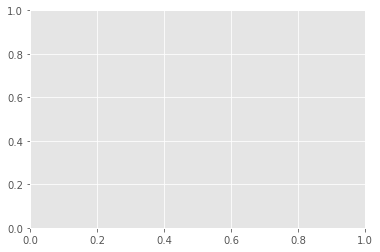

In [88]:
plt.plot(x = [y_test, y_test_pred],y= [ X_test.index.values])
plt.show()